<h2>Predict Raiting of Google Apps</h2>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime,date


In [2]:
data = pd.read_csv("E:\Parhaii\Semester 7\Machine Learing\Project\dataset\googleplaystore.csv")


In [3]:
data.head()
data.tail()


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device
10840,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,25-Jul-18,Varies with device,Varies with device


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(11)
memory usage: 550.6+ KB


In [5]:
rating_count=data['Rating'].value_counts()
print(rating_count)

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64


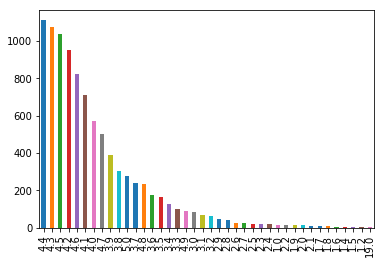

In [6]:
rating_count.plot('bar')

In [7]:
#rating must not be greaten than 5
print("Shape before Droping the Row which rating was 19.0  is " + str(data.shape[0]))
value=data.loc[data['Rating'] == 19.]
print(value)
data=data.drop(data.index[[10472]])
print("Shape After Droping the Row which rating was 19.0 " + str(data.shape[0]))

Shape before Droping the Row which rating was 19.0  is 10841
      Category  Rating Reviews    Size Installs Type     Price Content Rating  \
10472      1.9    19.0    3.0M  1,000+     Free    0  Everyone            NaN   

          Genres Last Updated Current Ver Android Ver  
10472  11-Feb-18       1.0.19  4.0 and up         NaN  
Shape After Droping the Row which rating was 19.0 10840


In [8]:
for col in data:
    sumofnan=data[col].isnull().values.sum()
    print("Total NaN values in " + str(col) + " Column " + "= "+ str(sumofnan))


Total NaN values in Category Column = 0
Total NaN values in Rating Column = 1474
Total NaN values in Reviews Column = 0
Total NaN values in Size Column = 0
Total NaN values in Installs Column = 0
Total NaN values in Type Column = 1
Total NaN values in Price Column = 0
Total NaN values in Content Rating Column = 0
Total NaN values in Genres Column = 0
Total NaN values in Last Updated Column = 0
Total NaN values in Current Ver Column = 8
Total NaN values in Android Ver Column = 2


In [9]:
#mostly NaN values are in our Rating column , So lets remove this with the most frequent value in Rating
mode_rating = data['Rating'].mode() #mode will give us the most frequent values
mode_rating = float(mode_rating) #covert to float
print("Most Frequent value in Rating Column = " +str(mode_rating))
unstable_data=data['Rating'].fillna(mode_rating)
unstable_count=unstable_data.value_counts()


Most Frequent value in Rating Column = 4.4


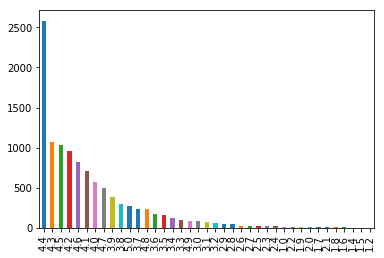

In [10]:
unstable_count.plot('bar')

In [11]:
print("Shape before Droping the Row having Nan " + str(data.shape[0]))
data = data[pd.notnull(data['Rating'])]
print("Shape After Droping the Rows having NaN " + str(data.shape[0]))

Shape before Droping the Row having Nan 10840
Shape After Droping the Rows having NaN 9366


In [12]:
data['Reviews'] = pd.to_numeric(data['Reviews'])
data.tail(5)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10834,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10836,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device
10840,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,25-Jul-18,Varies with device,Varies with device


In [13]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [14]:
data = data.drop(data[data.Size.str.contains('Varies with device')].index,axis=0)
data['Size'].unique()


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', '9.4M', '15M', '10M', '1.2M', '26M', '8.0M', '7.9M',
       '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M', '8.6M', '2.4M',
       '27M', '2.5M', '7.0M', '16M', '3.4M', '8.9M', '3.9M', '2.9M',
       '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M', '9.8M', '52M',
       '9.0M', '6.7M', '30M', '2.6M', '7.1M', '22M', '6.4M', '3.2M',
       '8.2M', '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M',
       '3.5M', '4.0M', '2.3M', '2.1M', '42M', '9.1M', '55M', '23k',
       '7.3M', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '3.7M', '118k', '44M', '695k',
       '1.6M', '6.2M', '53M', '1.4M', '3.0M', '7.2M', '5.8M', '3.8

In [15]:
def remove_size(size):
    if 'M' == size[-1:]:
        x=size[:-1]
        x = float(x)*1000000
    elif 'k' == size[-1:]:
        x=size[:-1]
        x = float(x)*1000000
    return x
        
data['Size'] = data['Size'].map(remove_size)
data['Size'] = pd.to_numeric(data['Size'],errors='coerce')
data.tail()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10833,BOOKS_AND_REFERENCE,4.8,44,619000000.0,"1,000+",Free,0,Everyone,Books & Reference,23-Mar-14,0.8,2.2 and up
10834,FAMILY,4.0,7,2600000.0,500+,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10836,FAMILY,4.5,38,53000000.0,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,FAMILY,5.0,4,3600000.0,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10840,LIFESTYLE,4.5,398307,19000000.0,"10,000,000+",Free,0,Everyone,Lifestyle,25-Jul-18,Varies with device,Varies with device


In [16]:
data['Installs'] = data.Installs.str.replace(',','')
data['Installs'] = data.Installs.str.replace('+','')
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,ART_AND_DESIGN,3.8,178,19000000.0,50000,Free,0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,ART_AND_DESIGN,4.1,36815,29000000.0,1000000,Free,0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,ART_AND_DESIGN,4.4,13791,33000000.0,1000000,Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,ART_AND_DESIGN,4.7,121,3100000.0,10000,Free,0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


['Free' 'Paid']


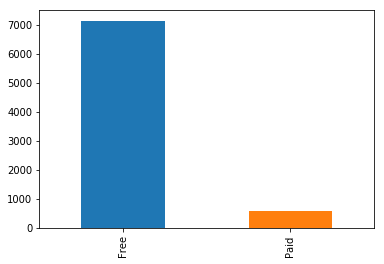

In [17]:
data['Type'] = data.Type.str.replace('0','Free')
print(data['Type'].unique())
type_count=data['Type'].value_counts()
type_count.plot('bar')

In [18]:

data['Price']=data.Price.str.replace('\$',' ')
data['Price']=pd.to_numeric(data['Price'],errors='coerce')
print(data['Price'].unique())
price_count = data['Price'].value_counts()
print("Price Count " + str(price_count))

[  0.     4.99   6.99   7.99   3.99   5.99   2.99   1.99   9.99   0.99
   9.     5.49  10.    24.99  11.99  79.99  16.99  14.99  29.99  12.99
   3.49  10.99   7.49   1.5   19.99  15.99  33.99  39.99   2.49   4.49
   1.7    1.49   3.88 399.99  17.99 400.     3.02   1.76   4.84   4.77
   1.61   1.59   6.49   1.29 299.99 379.99  37.99  18.99 389.99   8.49
   1.75  14.     2.     3.08   2.59  19.4   15.46   8.99   3.04  13.99
   4.29   3.28   4.6    1.     2.9    1.97   2.56   1.2 ]
Price Count 0.00      7150
0.99       106
2.99       101
4.99        63
1.99        53
3.99        45
1.49        28
2.49        17
9.99        16
5.99        15
399.99      11
14.99       10
6.99         9
4.49         8
7.99         7
3.49         6
29.99        6
19.99        5
24.99        5
11.99        4
12.99        4
10.00        3
16.99        3
10.99        2
9.00         2
1.00         2
33.99        2
8.99         2
79.99        2
1.70         2
          ... 
1.97         1
3.02         1
400.00   

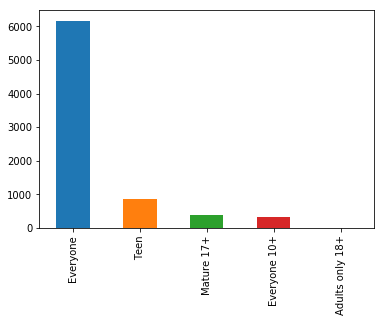

In [19]:
data['Content Rating'].unique()
data = data.drop(data[data['Content Rating'].str.contains('Unrated')].index,axis=0)
cotent_rating_count = data['Content Rating'].value_counts()
cotent_rating_count.plot('bar') 

In [20]:
data = data.drop(data[data['Content Rating'].str.contains('Unrated')].index,axis=0)

In [21]:
days = pd.to_datetime(data['Last Updated'])
data['Updated_Days'] = days.apply(lambda x:date.today() - datetime.date(x))

data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Updated_Days
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,342 days
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,334 days
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,136 days
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,190 days
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,178 days


In [22]:
data['Updated_Days']=data['Updated_Days'].dt.days
data=data.drop(['Last Updated'],axis=1)
data['Updated_Days']=pd.to_numeric(data['Updated_Days'],errors = 'coerce')

data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Days
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,342
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,334
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,136
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,190
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,178


In [23]:
temp1 =  data['Current Ver'].str.split('.',n=9,expand =True)
temp1 = temp1.fillna('0')
temp1.isna().sum()
temp1 = temp1[0] + '.' + temp1[1]
temp1 = temp1.str.replace('Varies with device.0','4.4')
temp1 =  temp1.str.split(' ',n=9,expand =True)
temp1 = temp1[0]
temp1 = temp1.str.replace('Varies','4.4')
temp1 =  temp1.str.split('-',n=20,expand =True)
temp1 = temp1[0]
temp3 = temp1.str.replace('v','')
temp3 = temp3.str.replace('V','')
temp3 = temp3.str.replace('Cow V','')
temp3 = temp3.str.replace('[','')
temp3 = temp3.str.replace(',','')
temp3 = temp3.str.replace('ersion','')
temp3 = temp3.str.replace('_','')
temp3 = temp3.str.replace(':','')
temp3 = temp3.str.replace('T','')
temp3 = temp3.str.replace('f','')
temp3 = temp3.str.replace('R','')
temp3 = temp3.str.replace('B','')
temp3 = temp3.str.replace('04.04','4.4')
temp3 = temp3.str.replace('aries with deice','4.4')
temp3 = temp3.str.replace('Android','4.4')
temp3 = temp3.str.replace('Cow','4.4')
data['Current Ver'] = temp3


In [24]:

data['Android Ver'] = data['Android Ver'].str.replace('and up','')
data['Android Ver'] = data['Android Ver'].str.replace('4.4W','4.4')
data['Android Ver'] = data['Android Ver'].str.replace('5.0 - 8.0 ','5.0')
data['Android Ver'] = data['Android Ver'].str.replace('4.0.3 - 7.1.1','4.0.3')
data['Android Ver'] = data['Android Ver'].str.replace('4.1 - 7.1.1','4.1')
data['Android Ver'] = data['Android Ver'].str.replace('5.0 - 6.0','5.0')
data['Android Ver'] = data['Android Ver'].str.replace('7.0 - 7.1.1','7.0')
data['Android Ver'] = data['Android Ver'].str.replace('5.0 - 8.0','5.0')
data['Android Ver'] = pd.to_numeric(data['Android Ver'],errors = 'coerce')
data['Android Ver'].value_counts()

4.1    1931
4.0    1109
4.4     812
2.3     566
5.0     493
4.2     318
3.0     211
2.2     206
4.3     195
2.1     113
1.6      87
6.0      45
7.0      40
3.2      31
2.0      27
5.1      17
1.5      15
3.1       8
8.0       5
1.0       2
7.1       2
Name: Android Ver, dtype: int64

In [25]:
data.describe()

,Rating,Reviews,Size,Installs,Price,Android Ver,Updated_Days
count,7728.000000,7.728000e+03,7.728000e+03,7.728000e+03,7728.000000,6233.000000,7728.000000
mean,4.173861,2.947105e+05,3.728851e+07,8.418816e+06,1.127760,3.886235,412.395704
std,0.544597,1.863345e+06,9.351488e+07,5.014161e+07,17.402418,0.888606,415.801886
min,1.000000,1.000000e+00,1.000000e+06,1.000000e+00,0.000000,1.000000,129.000000
25%,4.000000,1.077500e+02,6.100000e+06,1.000000e+04,0.000000,4.000000,151.000000
50%,4.300000,2.330000e+03,1.600000e+07,1.000000e+05,0.000000,4.100000,214.000000
75%,4.500000,3.898025e+04,3.700000e+07,1.000000e+06,0.000000,4.300000,504.000000
max,5.000000,4.489389e+07,9.940000e+08,1.000000e+09,400.000000,8.000000,3130.000000


In [26]:
#mostly NaN values are in our Rating column , So lets remove this with the most frequent value in Rating
mode_ver = data['Android Ver'].mode() #mode will give us the most frequent values
mode_ver = float(mode_ver) #covert to float
print("Most Frequent value in Rating Column = " +str(mode_rating))
data['Android Ver']=data['Android Ver'].fillna(mode_rating)
data['Android Ver'].unique()


Most Frequent value in Rating Column = 4.4


array([4.4, 4.2, 2.3, 3. , 4.1, 4. , 2.2, 5. , 6. , 1.6, 2.1, 1.5, 7. ,
       4.3, 2. , 3.2, 5.1, 7.1, 8. , 3.1, 1. ])

In [27]:
from sklearn import preprocessing
import numpy as np
path="E:\\Parhaii\\Semester 7\\Machine Learing\\Project\\"
catlabelEncoder = preprocessing.LabelEncoder()
typelabelEncoder = preprocessing.LabelEncoder()
cotlabelEncoder = preprocessing.LabelEncoder()
genlabelEncoder = preprocessing.LabelEncoder()

catlabelEncoder.fit(data['Category'])
typelabelEncoder.fit(data['Type'])
cotlabelEncoder.fit(data['Content Rating'])
genlabelEncoder.fit(data['Genres'])

data['Category'] = catlabelEncoder.transform(data['Category'])
data['Type'] = typelabelEncoder.transform(data['Type'])
data['Content Rating'] = cotlabelEncoder.transform(data['Content Rating'])
data['Genres'] = genlabelEncoder.transform(data['Genres'])

np.save(path+'catlabelEncoder', catlabelEncoder.classes_)
np.save(path+'typelabelEncoder', typelabelEncoder.classes_)
np.save(path+'cotlabelEncoder', cotlabelEncoder.classes_)
np.save(path+'genlabelEncoder', genlabelEncoder.classes_)


data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Days
0,0,4.1,159,19000000.0,10000,0,0.0,1,9,1.0,4.4,342
1,0,3.9,967,14000000.0,500000,0,0.0,1,11,2.0,4.4,334
2,0,4.7,87510,8700000.0,5000000,0,0.0,1,9,1.2,4.4,136
3,0,4.5,215644,25000000.0,50000000,0,0.0,4,9,4.4,4.2,190
4,0,4.3,967,2800000.0,100000,0,0.0,1,10,1.1,4.4,178


In [28]:
data


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Days
0,0,4.1,159,19000000.0,10000,0,0.0,1,9,1.0,4.4,342
1,0,3.9,967,14000000.0,500000,0,0.0,1,11,2.0,4.4,334
2,0,4.7,87510,8700000.0,5000000,0,0.0,1,9,1.2,4.4,136
3,0,4.5,215644,25000000.0,50000000,0,0.0,4,9,4.4,4.2,190
4,0,4.3,967,2800000.0,100000,0,0.0,1,10,1.1,4.4,178
5,0,4.4,167,5600000.0,50000,0,0.0,1,9,1.0,2.3,629
6,0,3.8,178,19000000.0,50000,0,0.0,1,9,1.1,4.4,233
7,0,4.1,36815,29000000.0,1000000,0,0.0,1,9,6.1,4.2,184
8,0,4.4,13791,33000000.0,1000000,0,0.0,1,9,2.9,3.0,451
9,0,4.7,121,3100000.0,10000,0,0.0,1,10,2.8,4.4,165


In [29]:
full_data = data.copy()
X = data[['Category','Size','Type','Content Rating','Genres','Android Ver']]
Y =data['Rating']


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [31]:

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)

C:\Users\Muhammad\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
import pickle

CLF = path +'classfier.sav'
pickle.dump(regressor, open(CLF, 'wb'))


In [33]:
Y_pred = regressor.predict(X_test)
Y_pred = Y_pred.round(1)
print(Y_pred)


[4.1 4.1 3.6 ... 3.9 3.8 3.9]


In [34]:
sales = [('Category', ['Everyone']),
         ('Size', [1024]),
         ('Type', ['Paid']),
         ('Content Rating', ['Teen']),
         ('Genres', ['Lifestyle']),
         ('Android Ver', [4.1])
         ]
df = pd.DataFrame.from_items(sales)



catlabelEncoder.fit(df['Category'])
typelabelEncoder.fit(df['Type'])
cotlabelEncoder.fit(df['Content Rating'])
genlabelEncoder.fit(df['Genres'])

df['Category'] = catlabelEncoder.transform(df['Category'])
df['Type'] = typelabelEncoder.transform(df['Type'])
df['Content Rating'] = cotlabelEncoder.transform(df['Content Rating'])
df['Genres'] = genlabelEncoder.transform(df['Genres'])


print(df)
print(regressor.predict(df))

   Category  Size  Type  Content Rating  Genres  Android Ver
0         0  1024     0               0       0          4.1
[4.29]


C:\Users\Muhammad\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


In [35]:
X = full_data[['Category','Size','Type','Content Rating','Genres','Android Ver']]
Y =full_data['Rating']
regressor.fit(X, Y)

CLF = path +'model.sav'
pickle.dump(regressor, open(CLF, 'wb'))
